In [1]:
library("readr") # data input
library('tidyr') # data wrangling
library('dplyr') # data manipulation
library('ggplot2') # visualization
library('ggthemes') # visualization
library('corrplot') # visualization
library('lubridate') # date and time
library('purrr') # data manipulation
library('cowplot')# visualization
library('maps')# visualization
library('viridis')# visualization
library('treemap')
library('leaflet')
library('dygraphs')
library('graphics')
library('forecast')
library('xts')
library('IRdisplay')
options(scipen = 999)
options(warn = -1)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

corrplot 0.84 loaded

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggthemes’:

    theme_map

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map

Loading required package: viridisLite
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: zoo

Attaching package: ‘zoo’

The followin

In [2]:
fao <-read_csv('../input/milkdata/milkdata.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  Nomenclature = col_character(),
  iso3_d = col_character(),
  ProductCode = col_character(),
  ReporterName = col_character(),
  iso3_o = col_character(),
  PartnerName = col_character(),
  TradeFlowName = col_character()
)
See spec(...) for full column specifications.


In [3]:
head(fao)

Nomenclature,iso3_d,ProductCode,ReporterName,iso3_o,PartnerName,TradeFlowName,TradeFlowCode,1962,1963,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S1,ABW,milk,Aruba,ANT,Netherlands Antilles,Import,5,NA,NA,⋯,112.174,94.396,NA,NA,NA,NA,NA,NA,NA,NA
S1,ABW,milk,Aruba,ARG,Argentina,Import,5,NA,NA,⋯,70.616,10.940,14.426,NA,NA,NA,NA,NA,NA,NA
S1,ABW,milk,Aruba,AUS,Australia,Import,5,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S1,ABW,milk,Aruba,AUT,Austria,Import,5,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S1,ABW,milk,Aruba,BLX,Belgium-Luxembourg,Import,5,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S1,ABW,milk,Aruba,BRA,Brazil,Import,5,NA,NA,⋯,47.263,59.301,NA,57.175,NA,3.071,NA,NA,NA,NA


In [4]:
names(fao)

[1] "Nomenclature"  "iso3_d"        "ProductCode"   "ReporterName" 
 [5] "iso3_o"        "PartnerName"   "TradeFlowName" "TradeFlowCode"
 [9] "1962"          "1963"          "1964"          "1965"         
[13] "1966"          "1967"          "1968"          "1969"         
[17] "1970"          "1971"          "1972"          "1973"         
[21] "1974"          "1975"          "1976"          "1977"         
[25] "1978"          "1979"          "1980"          "1981"         
[29] "1982"          "1983"          "1984"          "1985"         
[33] "1986"          "1987"          "1988"          "1989"         
[37] "1990"          "1991"          "1992"          "1993"         
[41] "1994"          "1995"          "1996"          "1997"         
[45] "1998"          "1999"          "2000"          "2001"         
[49] "2002"          "2003"          "2004"          "2005"         
[53] "2006"          "2007"          "2008"          "2009"         
[57] "2010"          "2011"          "2012"          "2013"         
[61] "2014"          "2015"          "2016"          "2017"         
[65] "2018"

In [5]:
fao[is.na(fao)]=0

In [6]:
dim(fao)

[1] 11584    65

In [7]:
fao5 <- fao %>% gather(9:60 ,key = "year", value = "Total")%>%
group_by(ReporterName,year) %>%
summarise(TP = sum(Total)) 

In [8]:
fao %>% gather(61:65 ,key = "year", value = "Total")%>%
group_by(ReporterName,year) %>%
summarise(TP = sum(Total)) %>% filter(ReporterName == "Netherlands")

ReporterName,year,TP
<chr>,<chr>,<dbl>
Netherlands,2014,1406733.8
Netherlands,2015,1004018.0
Netherlands,2016,941513.5
Netherlands,2017,538575.3
Netherlands,2018,0.0


In [9]:
fao5 = fao5 %>% filter(ReporterName == "Netherlands")

In [10]:
names(fao5)

[1] "ReporterName" "year"         "TP"

In [11]:
fao5 = fao5[ ,-1]

In [12]:
#Loading the required libraries
options(repr.plot.width=6, repr.plot.height=4)
library(graphics)
library(forecast)
library(tseries)

In [13]:
myts <- ts(fao5$TP, start=c(1962, 1), end=c(2013, 1), frequency=1)

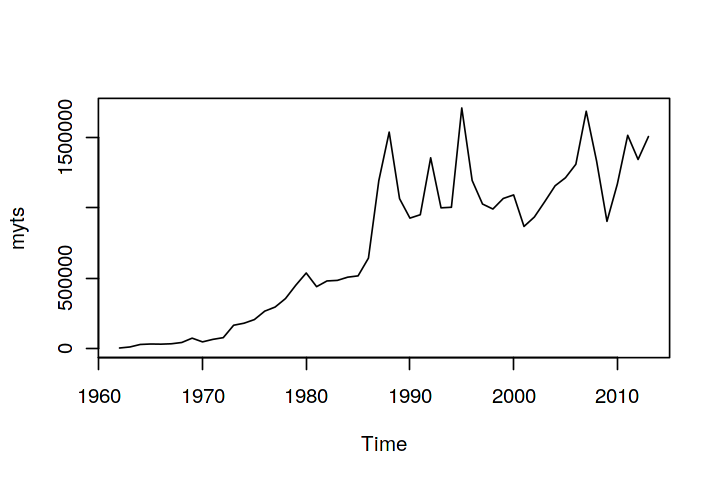

In [14]:
plot(myts)

In [15]:
suppressMessages(library(nnfor)) 

In [16]:
fit1 <- mlp(myts)

MLP fit with 5 hidden nodes and 20 repetitions.
Univariate lags: (1,2,3)
Forecast combined using the median operator.
MSE: 21544501651.7822.


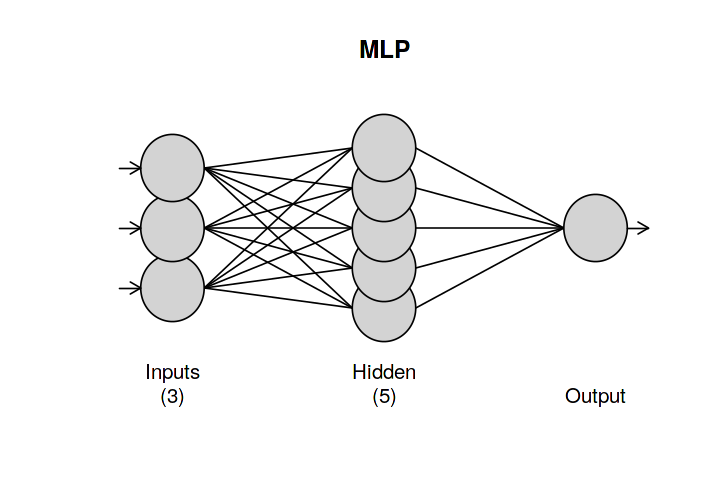

In [17]:
print(fit1)
plot(fit1)

In [18]:
fit <- arima(myts, order=c(1,0,12))

In [19]:
tail(fao$)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected ')'
1: tail(fao$)
             ^


In [20]:
library(forecast)
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,22659.74,152519.4,105270.9,-140.0418,153.7972,0.7180791,-0.0371967


In [21]:
fao %>% gather(61:65 ,key = "year", value = "Total")%>%
group_by(ReporterName,year) %>%
summarise(TP = sum(Total)) %>% filter(ReporterName == "Netherlands")

ReporterName,year,TP
<chr>,<chr>,<dbl>
Netherlands,2014,1406733.8
Netherlands,2015,1004018.0
Netherlands,2016,941513.5
Netherlands,2017,538575.3
Netherlands,2018,0.0


     Point Forecast
2014        1437296
2015        1333122
2016        1370619
2017        1401636
2018        1378553
2019        1367128
2020        1365083
2021        1367951

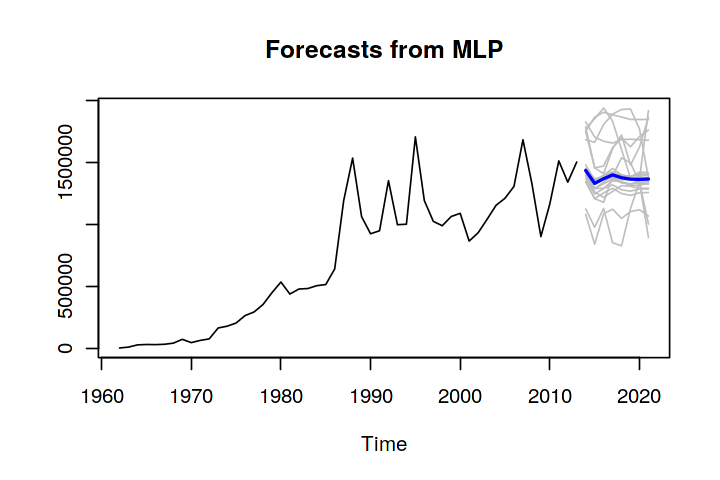

In [22]:
# predict next 5 observations
library(forecast)
forecast(fit1, 8)
plot(forecast(fit1, 8))

     Point Forecast     Lo 80   Hi 80     Lo 95   Hi 95
2014        1728060 1523550.3 1932570 1415289.2 2040831
2015        1451493 1176386.7 1726599 1030754.3 1872231
2016        1248994  958460.9 1539527  804662.1 1693326
2017        1182454  861407.3 1503500  691455.6 1673452
2018        1259651  900090.9 1619211  709751.3 1809551
2019        1238565  850480.1 1626649  645040.6 1832089
2020        1388229  992919.2 1783538  783654.9 1992803
2021        1420562  967672.9 1873451  727927.9 2113196

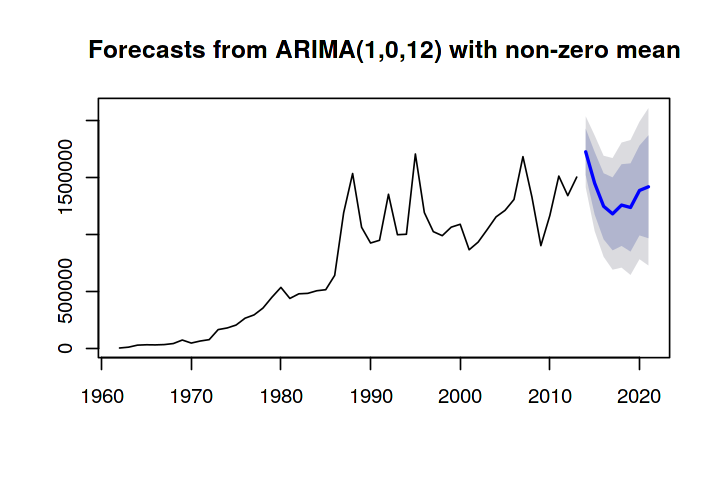

In [23]:
# predict next 5 observations
library(forecast)
forecast(fit, 8)
plot(forecast(fit, 8))

In [24]:
library(forecast)
# Automated forecasting using an exponential model
fit <- ets(myts)

# Automated forecasting using an ARIMA model
fit <- auto.arima(myts)

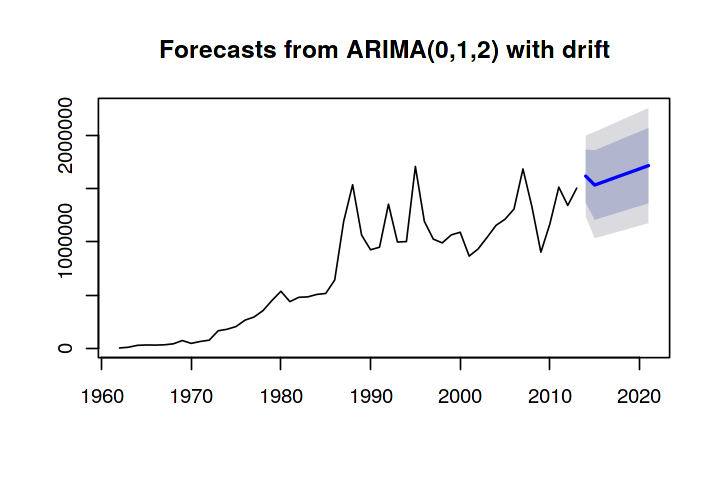

In [25]:
plot(forecast(fit, 8))